# Telco Customer Churn Project

Each row represents a customer, each column contains customer’s attributes.

The raw data contains 7043 rows (customers) and 21 columns (features).

The "Churn" column is our target.

#### Our Goal
We will try to estimate the target column "Churn" and will use classification metrics when evaluating the performance of our model!

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [19]:
df = pd.read_csv('Telco-Customer-Churn.csv')

In [20]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## 1. FEATURE ENGINEERING

##### We have 21 different features, including the target. Now we will work on 20 independent features seperately.

In [22]:
# There is no missing value:)
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [24]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [25]:
df2=df.copy()

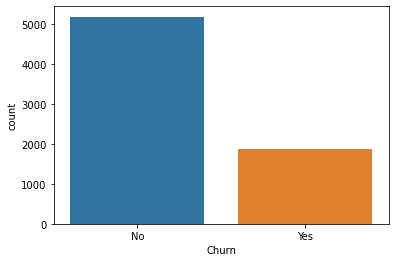

In [26]:
sns.countplot(df.Churn);

#### 1) 'customerID'   
I will drop it because it is not usable in classification

In [28]:
df=df.drop('customerID', axis=1)

#### 2) 'gender'
Gender column should be converted to numeric.

In [29]:
df.gender.value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

In [30]:
df['gender']=df.gender.replace('Female',1).replace('Male',0)

In [31]:
df.gender.value_counts()

0    3555
1    3488
Name: gender, dtype: int64

#### 3) 'SeniorCitizen'
This column's type is already integer, so we will let it as it is.

In [33]:
df.SeniorCitizen.value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

#### 4) 'Partner'
This column should also be converted to numeric.

In [34]:
df.Partner.value_counts()

No     3641
Yes    3402
Name: Partner, dtype: int64

In [36]:
df['Partner']=df.Partner.replace('Yes',1).replace('No',0)

In [37]:
df.Partner.value_counts()

0    3641
1    3402
Name: Partner, dtype: int64

#### 5) 'Dependents'
This column should also be converted to numeric.

In [86]:
df.Dependents.value_counts()

No     4933
Yes    2110
Name: Dependents, dtype: int64

In [87]:
df['Dependents']=df.Dependents.replace('Yes',1).replace('No',0)

In [88]:
df.Dependents.value_counts()

0    4933
1    2110
Name: Dependents, dtype: int64

#### 6) 'tenure'
This column's type is already integer, so we will let it as it is.

In [39]:
df.tenure.describe()

count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64

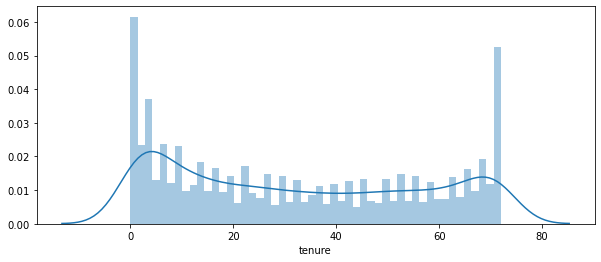

In [43]:
plt.figure(figsize=(10,4))
sns.distplot(df['tenure'], bins=50);

In [41]:
df.tenure.value_counts()

1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64

#### 7) 'PhoneService'
This column should also be converted to numeric.

In [45]:
df.PhoneService.value_counts()

Yes    6361
No      682
Name: PhoneService, dtype: int64

In [46]:
df['PhoneService']=df.PhoneService.replace('Yes',1).replace('No',0)

In [47]:
df.PhoneService.value_counts()

1    6361
0     682
Name: PhoneService, dtype: int64

#### 8) 'MultipleLines'
This column should also be converted to numeric.

In [48]:
df.MultipleLines.value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

In [49]:
df['MultipleLines']=df.MultipleLines.replace('Yes',2).replace('No',1).replace('No phone service',0)

In [50]:
df.MultipleLines.value_counts()

1    3390
2    2971
0     682
Name: MultipleLines, dtype: int64

#### 9) 'InternetService'
This column includes 3 different values: Fiber optic, DSL, and No. Although using get_dummies for this feature is an option, I will convert it into numeric since the values seems to be ordinal: Fiber optic > DSL > No

In [51]:
df.InternetService.value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

In [52]:
df['InternetService']=df.InternetService.replace('Fiber optic',2).replace('DSL',1).replace('No',0)

In [53]:
df.InternetService.value_counts()

2    3096
1    2421
0    1526
Name: InternetService, dtype: int64

#### 10) 'OnlineSecurity'
This feature seems like InternetService feature, so this will also be converted to numeric.

In [54]:
df.OnlineSecurity.value_counts()

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

In [55]:
df['OnlineSecurity']=df.OnlineSecurity.replace('Yes',2).replace('No',1).replace('No internet service',0)

In [56]:
df.OnlineSecurity.value_counts()

1    3498
2    2019
0    1526
Name: OnlineSecurity, dtype: int64

#### 11) 'OnlineBackup'
This feature is just like OnlineSecurity feature, so this will also be converted to numeric.

In [57]:
df.OnlineBackup.value_counts()

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64

In [58]:
df['OnlineBackup']=df.OnlineBackup.replace('Yes',2).replace('No',1).replace('No internet service',0)

In [59]:
df.OnlineBackup.value_counts()

1    3088
2    2429
0    1526
Name: OnlineBackup, dtype: int64

#### 12) 'DeviceProtection'
Just like the above features, DeviceProtection feature will also be converted to numeric.

In [60]:
df.DeviceProtection.value_counts()

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64

In [61]:
df['DeviceProtection']=df.DeviceProtection.replace('Yes',2).replace('No',1).replace('No internet service',0)

In [62]:
df.DeviceProtection.value_counts()

1    3095
2    2422
0    1526
Name: DeviceProtection, dtype: int64

#### 13) 'TechSupport'
Just like the above features, TechSupport feature will also be converted to numeric.

In [63]:
df.TechSupport.value_counts()

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64

In [65]:
df['TechSupport']=df.TechSupport.replace('Yes',2).replace('No',1).replace('No internet service',0)

In [66]:
df.TechSupport.value_counts()

1    3473
2    2044
0    1526
Name: TechSupport, dtype: int64

#### 14) 'StreamingTV'
Just like the above features, TechSupport feature will also be converted to numeric.

In [67]:
df.StreamingTV.value_counts()

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64

In [68]:
df['StreamingTV']=df.StreamingTV.replace('Yes',2).replace('No',1).replace('No internet service',0)

In [69]:
df.StreamingTV.value_counts()

1    2810
2    2707
0    1526
Name: StreamingTV, dtype: int64

#### 15) 'StreamingMovies'
Just like the above features, TechSupport feature will also be converted to numeric. 

In [70]:
df.StreamingMovies.value_counts()

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64

In [72]:
df['StreamingMovies']=df.StreamingMovies.replace('Yes',2).replace('No',1).replace('No internet service',0)

In [73]:
df.StreamingMovies.value_counts()

1    2785
2    2732
0    1526
Name: StreamingMovies, dtype: int64

#### 16) 'Contract'
Contract feature includes 3 different values: Month-to-month , One year, and Two year. Although using get_dummies for this feature is an option, I will convert it into numeric since the values seems to be ordinal: Two year > One year > Month-to-month 
##### Additional explanation:
'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',  'StreamingMovies' and  'Contract' features seem alike. If the correlation between some of themn are very high (like >0.90), we may drop some of these features.

In [74]:
df.Contract.value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

In [75]:
df['Contract']=df.Contract.replace('Two year',2).replace('One year',1).replace('Month-to-month',0)

In [76]:
df.Contract.value_counts()

0    3875
2    1695
1    1473
Name: Contract, dtype: int64

#### 17) 'PaperlessBilling'
PaperlessBilling column should be converted to numeric.

In [77]:
df.PaperlessBilling.value_counts()

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64

In [78]:
df['PaperlessBilling']=df.PaperlessBilling.replace('Yes',1).replace('No',0)

In [80]:
df.PaperlessBilling.value_counts()

1    4171
0    2872
Name: PaperlessBilling, dtype: int64

#### 18) 'PaymentMethod'
PaymentMethod feature includes 4 different values. I will do nothing to this column but use get_dummies

In [81]:
df.PaymentMethod.value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

#### 19) 'MonthlyCharges'
MonthlyCharges is float and I will not touch it.

In [82]:
df.MonthlyCharges.value_counts()

20.05     61
19.85     45
19.95     44
19.90     44
20.00     43
          ..
114.75     1
103.60     1
113.40     1
57.65      1
113.30     1
Name: MonthlyCharges, Length: 1585, dtype: int64

In [83]:
df.MonthlyCharges.describe()

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: MonthlyCharges, dtype: float64

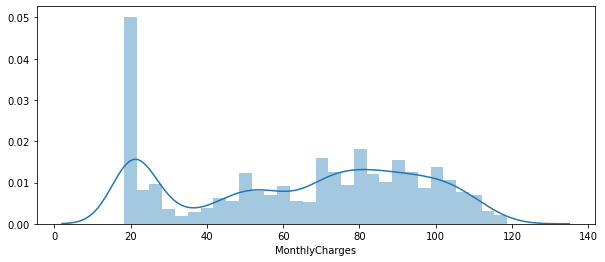

In [85]:
plt.figure(figsize=(10,4))
sns.distplot(df['MonthlyCharges'], bins=30);

#### 20) 'TotalCharges'
This feature should be float, but its type seems to be object. Let's correct it.

In [89]:
df.TotalCharges.value_counts()

           11
20.2       11
19.75       9
20.05       8
19.9        8
           ..
646.85      1
2727.8      1
1911.5      1
1222.25     1
827.05      1
Name: TotalCharges, Length: 6531, dtype: int64

In [122]:
df['TotalCharges']=pd.to_numeric(df['TotalCharges'], errors='ignore')
df['TotalCharges']=pd.to_numeric(df['TotalCharges'], errors='coerce')

In [123]:
df.TotalCharges.isnull().sum()

11

In [124]:
df.TotalCharges.describe()

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64

In [127]:
df.dropna(inplace=True)

#### 21) 'Churn'
This feature is our target, let's convert it into int.

In [133]:
df.Churn.value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

In [134]:
df['Churn']=df.Churn.replace('Yes',1).replace('No',0)

In [135]:
df.Churn.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   int64  
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   int64  
 3   Dependents        7032 non-null   int64  
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   int64  
 6   MultipleLines     7032 non-null   int64  
 7   InternetService   7032 non-null   int64  
 8   OnlineSecurity    7032 non-null   int64  
 9   OnlineBackup      7032 non-null   int64  
 10  DeviceProtection  7032 non-null   int64  
 11  TechSupport       7032 non-null   int64  
 12  StreamingTV       7032 non-null   int64  
 13  StreamingMovies   7032 non-null   int64  
 14  Contract          7032 non-null   int64  
 15  PaperlessBilling  7032 non-null   int64  
 16  PaymentMethod     7032 non-null   object 


In [137]:
df.shape

(7032, 20)

In [138]:
df= pd.get_dummies(df, drop_first=True)

In [139]:
df.shape

(7032, 22)

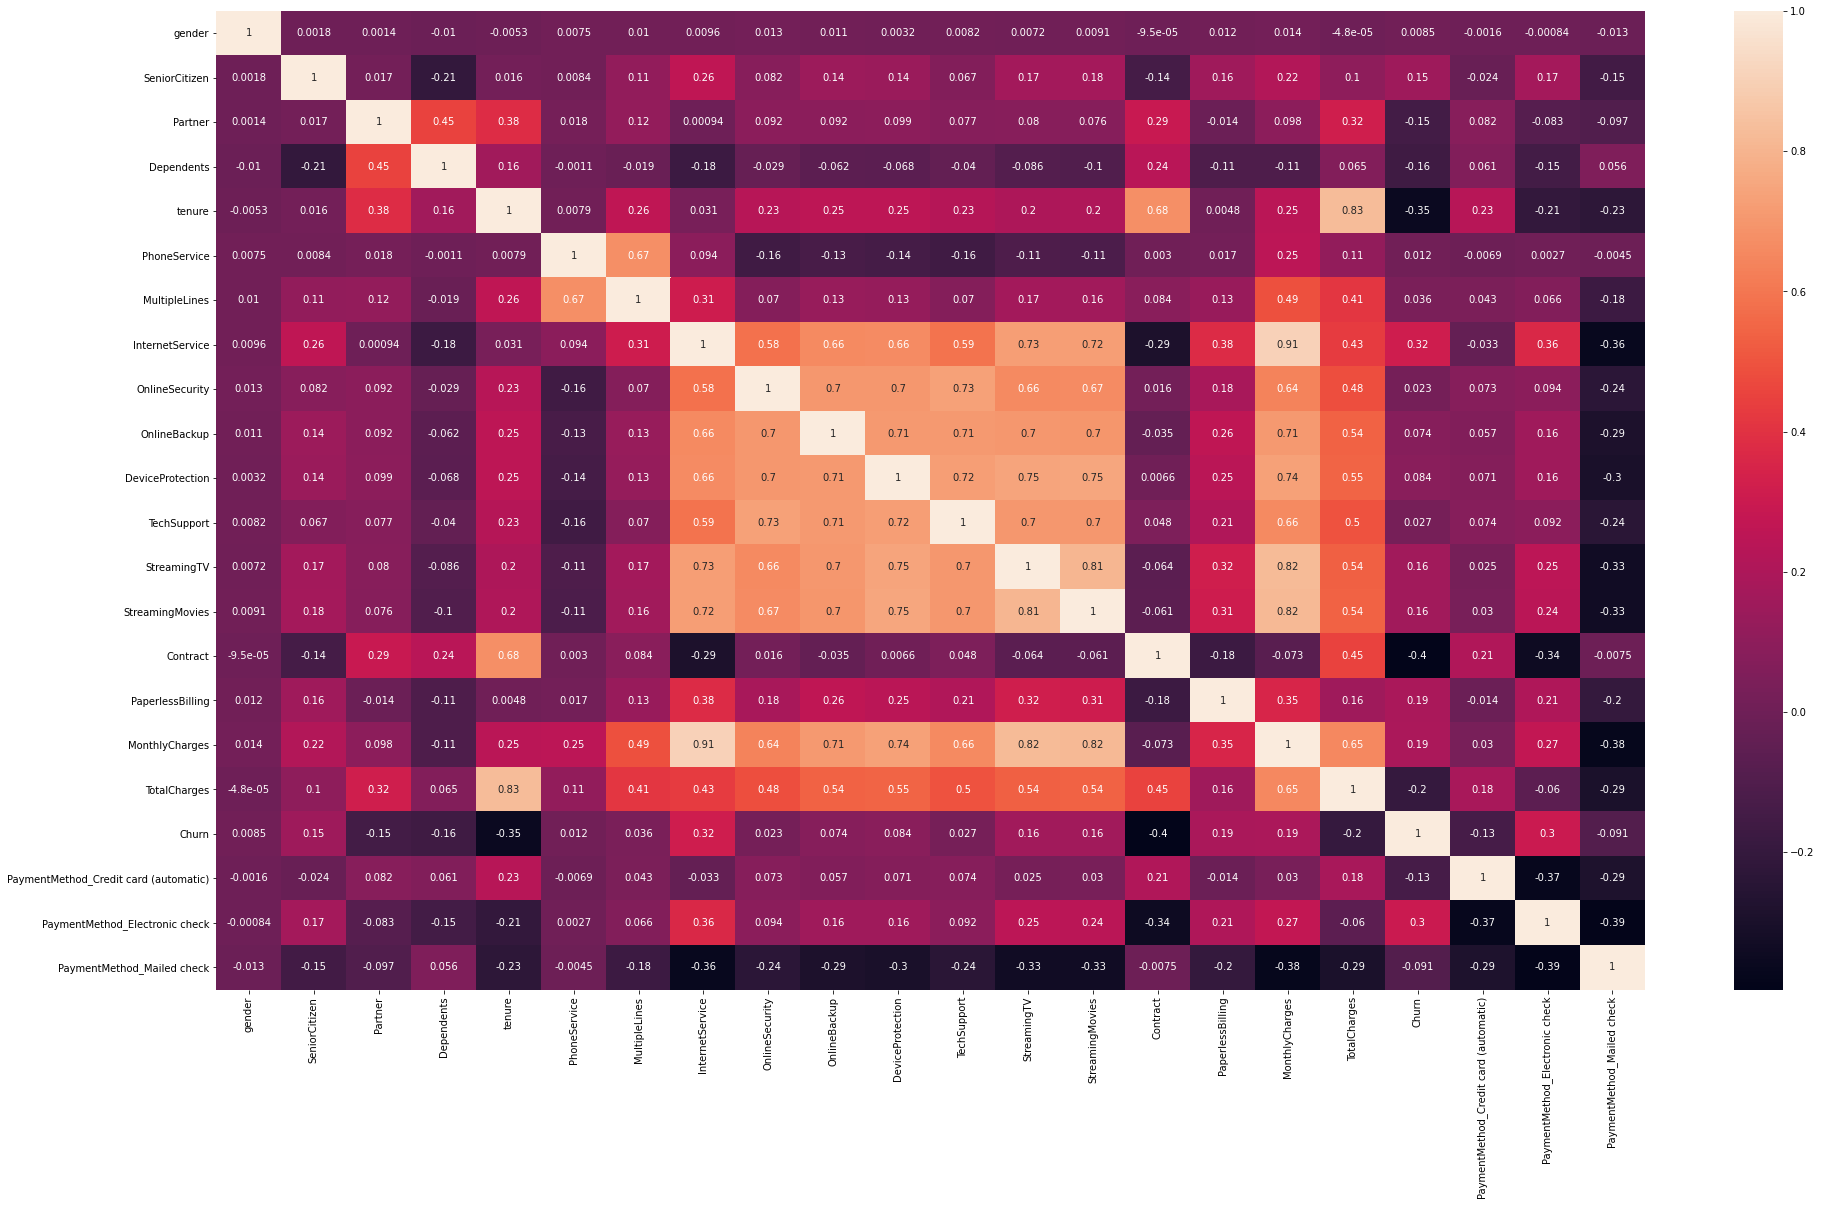

In [140]:
plt.figure(figsize=(32,18))
sns.heatmap(df.corr(), annot=True);

In [141]:
df.corr()['Churn'].sort_values()

Contract                                -0.396150
tenure                                  -0.354049
TotalCharges                            -0.199484
Dependents                              -0.163128
Partner                                 -0.149982
PaymentMethod_Credit card (automatic)   -0.134687
PaymentMethod_Mailed check              -0.090773
gender                                   0.008545
PhoneService                             0.011691
OnlineSecurity                           0.023014
TechSupport                              0.026744
MultipleLines                            0.036148
OnlineBackup                             0.073934
DeviceProtection                         0.084402
SeniorCitizen                            0.150541
StreamingMovies                          0.162672
StreamingTV                              0.164509
PaperlessBilling                         0.191454
MonthlyCharges                           0.192858
PaymentMethod_Electronic check           0.301455


# 2. Train Test Split

In [142]:
X = df.drop('Churn',axis=1).values
y = df['Churn'].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=33, stratify=y)

# 3. Scaling Data

In [143]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 4.Creating the Model

In [145]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.constraints import max_norm
from tensorflow.keras.optimizers import Adam

In [144]:
X_train.shape

(5274, 21)

In [146]:
model = Sequential()

model.add(Dense(units=21,activation='relu'))
model.add(Dense(units=21,activation='relu'))
model.add(Dense(units=11,activation='relu'))
model.add(Dense(units=6,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))

opt=Adam(lr=0.0001)
model.compile(loss='binary_crossentropy', optimizer=opt)

# 5. Training the Model

In [147]:
model.fit(x=X_train, 
          y=y_train, 
          batch_size=64,
          epochs=300,
          validation_data=(X_test, y_test), verbose=1
          )

Epoch 1/300
83/83 [==============================] - 1s 7ms/step - loss: 0.6583 - val_loss: 0.6319
Epoch 2/300
83/83 [==============================] - 0s 1ms/step - loss: 0.6249 - val_loss: 0.5983
Epoch 3/300
83/83 [==============================] - 0s 1ms/step - loss: 0.5911 - val_loss: 0.5688
Epoch 4/300
83/83 [==============================] - 0s 1ms/step - loss: 0.5549 - val_loss: 0.5422
Epoch 5/300
83/83 [==============================] - 0s 1ms/step - loss: 0.5350 - val_loss: 0.5161
Epoch 6/300
83/83 [==============================] - 0s 861us/step - loss: 0.5221 - val_loss: 0.4962
Epoch 7/300
83/83 [==============================] - 0s 1ms/step - loss: 0.4979 - val_loss: 0.4833
Epoch 8/300
83/83 [==============================] - 0s 1ms/step - loss: 0.4817 - val_loss: 0.4743
Epoch 9/300
83/83 [==============================] - 0s 1ms/step - loss: 0.4727 - val_loss: 0.4671
Epoch 10/300
83/83 [==============================] - 0s 1ms/step - loss: 0.4604 - val_loss: 0.4617
Epoch 1

In [148]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 21)                462       
_________________________________________________________________
dense_1 (Dense)              (None, 21)                462       
_________________________________________________________________
dense_2 (Dense)              (None, 11)                242       
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 72        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 7         
Total params: 1,245
Trainable params: 1,245
Non-trainable params: 0
_________________________________________________________________


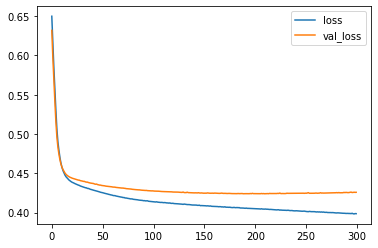

In [149]:
pd.DataFrame(model.history.history).plot();

In [150]:
from sklearn.metrics import classification_report, confusion_matrix

pred = model.predict_classes(X_test)
print(confusion_matrix(y_test,pred), '\n', '\n')
print(classification_report(y_test,pred))

[[1166  125]
 [ 226  241]] 
 

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1291
           1       0.66      0.52      0.58       467

    accuracy                           0.80      1758
   macro avg       0.75      0.71      0.72      1758
weighted avg       0.79      0.80      0.79      1758



C:\Users\aslik\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


## SMOTE Balancing

In [151]:
!pip install imblearn

In [152]:
from collections import Counter
from imblearn.over_sampling import SMOTE

In [153]:
# Increasing number of 'Yes' equal to 'No'
sm = SMOTE(random_state=99)
X_res, y_res = sm.fit_sample(X, y)
print('Resampled dataset shape {}'.format(Counter(y_res)))

Resampled dataset shape Counter({0: 5163, 1: 5163})


In [154]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.30, random_state=99)

In [155]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [157]:
model = Sequential()

model.add(Dense(units=21,activation='relu'))
model.add(Dense(units=21,activation='relu'))
model.add(Dense(units=11,activation='relu'))
model.add(Dense(units=6,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))

opt=Adam(lr=0.0001)
model.compile(loss='binary_crossentropy', optimizer=opt)

In [158]:
model.fit(x=X_train, 
          y=y_train, 
          batch_size=32,
          epochs=200,
          validation_data=(X_test, y_test), verbose=1
          )

Epoch 1/200
226/226 [==============================] - 1s 2ms/step - loss: 0.6858 - val_loss: 0.6703
Epoch 2/200
226/226 [==============================] - 0s 890us/step - loss: 0.6694 - val_loss: 0.6459
Epoch 3/200
226/226 [==============================] - 0s 941us/step - loss: 0.6428 - val_loss: 0.6117
Epoch 4/200
226/226 [==============================] - 0s 872us/step - loss: 0.6067 - val_loss: 0.5629
Epoch 5/200
226/226 [==============================] - 0s 949us/step - loss: 0.5662 - val_loss: 0.5238
Epoch 6/200
226/226 [==============================] - 0s 911us/step - loss: 0.5210 - val_loss: 0.5011
Epoch 7/200
226/226 [==============================] - 0s 856us/step - loss: 0.5216 - val_loss: 0.4896
Epoch 8/200
226/226 [==============================] - 0s 1ms/step - loss: 0.5075 - val_loss: 0.4831
Epoch 9/200
226/226 [==============================] - 0s 1ms/step - loss: 0.5032 - val_loss: 0.4794
Epoch 10/200
226/226 [==============================] - 0s 928us/step - loss: 0

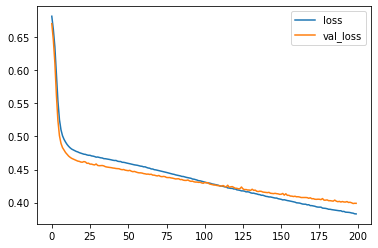

In [159]:
pd.DataFrame(model.history.history).plot();

In [161]:
pred = model.predict_classes(X_test)
print(confusion_matrix(y_test,pred), '\n', '\n')
print(classification_report(y_test,pred))

[[1238  303]
 [ 263 1294]] 
 

              precision    recall  f1-score   support

           0       0.82      0.80      0.81      1541
           1       0.81      0.83      0.82      1557

    accuracy                           0.82      3098
   macro avg       0.82      0.82      0.82      3098
weighted avg       0.82      0.82      0.82      3098



## 5.1 Training by using early stop

In [162]:
from tensorflow.keras.callbacks import EarlyStopping

In [163]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)

In [164]:
model_earl = Sequential()

model_earl.add(Dense(units=21,activation='relu'))
model_earl.add(Dropout(0.3))
model_earl.add(Dense(units=21,activation='relu'))
model_earl.add(Dropout(0.3))
model_earl.add(Dense(units=11,activation='relu'))
model_earl.add(Dropout(0.3))
model_earl.add(Dense(units=6,activation='relu'))
model_earl.add(Dropout(0.3))
model_earl.add(Dense(units=1,activation='sigmoid'))

opt=Adam(lr=0.00001)
model_earl.compile(loss='binary_crossentropy', optimizer='adam', )

In [165]:
model_earl.fit(x=X_train, 
          y=y_train,
          batch_size=32,
          epochs=300,
          callbacks=[early_stop],
          validation_data=(X_test, y_test), verbose=1)

Epoch 1/300
226/226 [==============================] - 1s 1ms/step - loss: 0.7152 - val_loss: 0.6364
Epoch 2/300
226/226 [==============================] - 0s 951us/step - loss: 0.6374 - val_loss: 0.5391
Epoch 3/300
226/226 [==============================] - 0s 1ms/step - loss: 0.5877 - val_loss: 0.5070
Epoch 4/300
226/226 [==============================] - 0s 1ms/step - loss: 0.5525 - val_loss: 0.4975
Epoch 5/300
226/226 [==============================] - 0s 1ms/step - loss: 0.5515 - val_loss: 0.4780
Epoch 6/300
226/226 [==============================] - 0s 1ms/step - loss: 0.5406 - val_loss: 0.4735
Epoch 7/300
226/226 [==============================] - 0s 1ms/step - loss: 0.5222 - val_loss: 0.4713
Epoch 8/300
226/226 [==============================] - 0s 958us/step - loss: 0.5395 - val_loss: 0.4670
Epoch 9/300
226/226 [==============================] - 0s 1ms/step - loss: 0.5308 - val_loss: 0.4642
Epoch 10/300
226/226 [==============================] - 0s 1ms/step - loss: 0.5286 - va

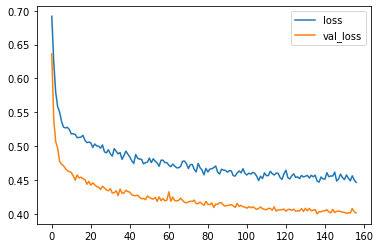

In [166]:
pd.DataFrame(model_earl.history.history).plot();

In [168]:
pred_earl = model_earl.predict_classes(X_test)
print(confusion_matrix(y_test,pred_earl), '\n', '\n')
print(classification_report(y_test,pred_earl))

[[1221  320]
 [ 234 1323]] 
 

              precision    recall  f1-score   support

           0       0.84      0.79      0.82      1541
           1       0.81      0.85      0.83      1557

    accuracy                           0.82      3098
   macro avg       0.82      0.82      0.82      3098
weighted avg       0.82      0.82      0.82      3098



In [169]:
pred = model.predict_classes(X_test)
print(confusion_matrix(y_test,pred), '\n', '\n')
print(classification_report(y_test,pred))

[[1238  303]
 [ 263 1294]] 
 

              precision    recall  f1-score   support

           0       0.82      0.80      0.81      1541
           1       0.81      0.83      0.82      1557

    accuracy                           0.82      3098
   macro avg       0.82      0.82      0.82      3098
weighted avg       0.82      0.82      0.82      3098



In [ ]:
# Lets see the score on all data set
print(df2.shape)
X2 = df2.drop('label',axis=1).values
y2 = df2['label'].values
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2,y2,test_size=0.2, random_state=33)

scaler = MinMaxScaler()
X_train2 = scaler.fit_transform(X_train2)
X_test2 = scaler.transform(X_test2)

In [ ]:
# 6. Model Evaluation

In [ ]:
# Lets see the score on all data set
print(df2.shape)
X2 = df2.drop('Churn',axis=1).values
y2 = df2['Churn'].values
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2,y2,test_size=0.2, random_state=33)

scaler = MinMaxScaler()
X_train2 = scaler.fit_transform(X_train2)
X_test2 = scaler.transform(X_test2)

pred2 = model.predict_classes(X_test2)

print(confusion_matrix(y_test2,pred2), '\n', '\n')
print(classification_report(y_test2,pred2))

pred_earl2 = model_earl.predict_classes(X_test2)

print(confusion_matrix(y_test2,pred_earl2), '\n', '\n')
print(classification_report(y_test2,pred_earl2))

In [ ]:
## 7. Let's try our model on a random customer

In [ ]:
#import random
#random.seed(42)
#random_ind = random.randint(0,len(df))

new_customer = df.drop('Churn',axis=1).iloc[101]
new_customer

In [ ]:
model.predict_classes(new_customer.values.reshape(1,21))

In [ ]:
df.iloc[101]['Churn']